In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_excel("data.xlsx")

In [3]:
data.head()

,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,...,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
0,1,0,1,0,2,4,3,4,4,2,...,4,4,4,4,4.0,4.0,4.0,1.0,3.20,1
1,2,0,0,0,2,4,4,4,4,3,...,4,3,4,4,3.0,4.0,3.0,0.0,3.82,1
2,3,0,1,0,1,3,2,3,4,3,...,3,4,4,3,4.0,4.0,2.0,1.0,3.75,1
3,4,1,1,1,3,4,4,4,4,4,...,4,4,4,4,3.0,4.0,4.0,1.0,3.70,1
4,5,0,0,0,2,4,3,3,4,3,...,4,3,3,3,4.0,4.0,2.0,1.0,3.82,0


In [4]:
y=data['Class']

In [5]:
x=data.drop(['ID','Class'],axis=1)

In [6]:
x.shape

(260, 37)

In [7]:
X_train, X_valid, Y_train, Y_valid= train_test_split(x,y,random_state=17,stratify=y,test_size=0.25)

In [8]:
dt_model=DecisionTreeClassifier(random_state=10)

In [9]:
X_train.isnull().sum()

Gender          0
Nationality     0
Major           0
Level           0
IE1             0
SMSK3           0
RAS1            0
RAS2            0
SMSK1           0
SMSK4           0
IE2             0
TL1             0
RAS3            0
IE3             0
RAS4            0
RAS5            0
IE4             0
SMSK2           0
TL2             0
TL3             0
PSD1            0
PSD2            0
PSD3            0
IE5             0
PSD4            0
PSD5            0
IM1             0
IM2             0
IM3             0
IM4             0
IM5             0
IM6             0
W1             11
W2             10
W3             36
Employed        2
Score           0
dtype: int64

In [10]:
X_train.fillna(np.round(X_train.mean()),inplace=True)
X_valid.fillna(np.round(X_valid.mean()),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
X_train.isnull().sum()

Gender         0
Nationality    0
Major          0
Level          0
IE1            0
SMSK3          0
RAS1           0
RAS2           0
SMSK1          0
SMSK4          0
IE2            0
TL1            0
RAS3           0
IE3            0
RAS4           0
RAS5           0
IE4            0
SMSK2          0
TL2            0
TL3            0
PSD1           0
PSD2           0
PSD3           0
IE5            0
PSD4           0
PSD5           0
IM1            0
IM2            0
IM3            0
IM4            0
IM5            0
IM6            0
W1             0
W2             0
W3             0
Employed       0
Score          0
dtype: int64

In [12]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=10)

In [13]:
dt_model.score(X_train,Y_train)


1.0

In [14]:
#dt_model.score(X_valid,Y_valid)
sklearn.metrics.f1_score(Y_valid, dt_model.predict(X_valid))

0.8813559322033898

In [15]:
dt_model.predict(X_valid)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [16]:
train_accuracy=[]
validation_accuracy=[]
for depth in range (1,10):
    dt_model=DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train,Y_train)
    train_accuracy.append(dt_model.score(X_train,Y_train))
    validation_accuracy.append(dt_model.score(X_valid,Y_valid))
                              

No handles with labels found to put in legend.


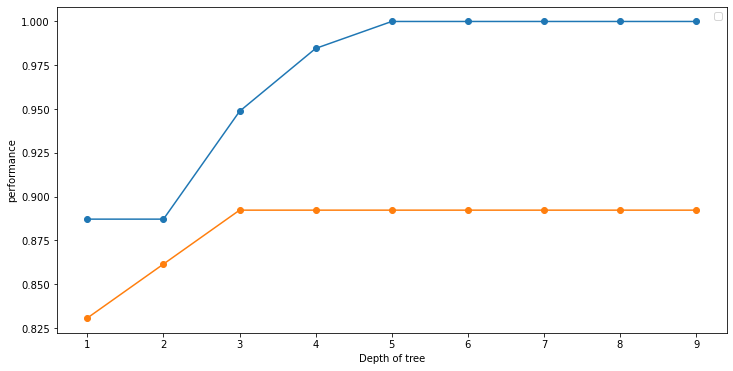

In [17]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o')
plt.plot(frame['max_depth'],frame['valid_acc'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

No handles with labels found to put in legend.


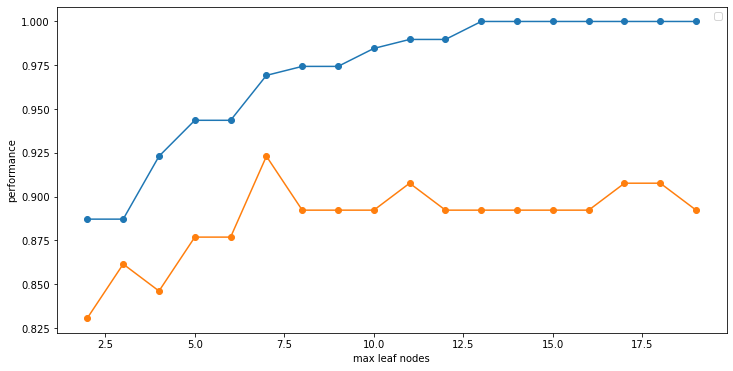

In [18]:
train_accuracy2=[]
validation_accuracy2=[]
for maxleaf in range (2,20):
    dt_model=DecisionTreeClassifier(max_leaf_nodes=maxleaf)
    dt_model.fit(X_train,Y_train)
    train_accuracy2.append(dt_model.score(X_train,Y_train))
    validation_accuracy2.append(dt_model.score(X_valid,Y_valid))
    
frame=pd.DataFrame({'max_leaf':range(2,20),'train_acc':train_accuracy2,'valid_acc':validation_accuracy2})
plt.figure(figsize=(12,6))
plt.plot(frame['max_leaf'],frame['train_acc'],marker='o')
plt.plot(frame['max_leaf'],frame['valid_acc'],marker='o')
plt.xlabel('max leaf nodes')
plt.ylabel('performance')
plt.legend()
                              

In [19]:
dt_model=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7)

In [20]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7)

In [21]:
dt_model.score(X_train,Y_train)


0.9692307692307692

In [22]:
sklearn.metrics.f1_score(Y_valid, dt_model.predict(X_valid))

0.9253731343283582

In [23]:
dt_model.score(X_valid,Y_valid)

0.9230769230769231